In [63]:
from skimage.measure import compare_ssim as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
import glob

In [64]:
band2R = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*real_B.png'
band2F = '/Users/Airton/Desktop/b2sparseless/results/weather/test_latest/images/*fake_B.png'
band6R = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*real_B.png'
band6F = '/Users/Airton/Desktop/band6/results_test/weather/test_latest/images/*fake_B.png'
visR = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*real_B.png'
visF = '/Users/Airton/Desktop/visibility/results_test/weather/test_latest/images/*fake_B.png'

In [65]:
MSE = [] 
SSIM =[]

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [66]:
run1R = []
for filename in sorted(glob.glob(visR)):
    im=Image.open(filename).convert('L')
    run1R.append(im)

In [67]:
run1F = []
for filename in sorted(glob.glob(visF)):
    im=Image.open(filename).convert('L')
    run1F.append(im)

In [68]:
print(len(run1F))
print(len(run1R))

50
50


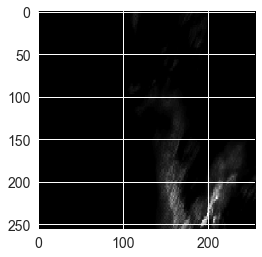

In [69]:
plt.imshow(np.array(run1R[0]),cmap='gray')
plt.show()

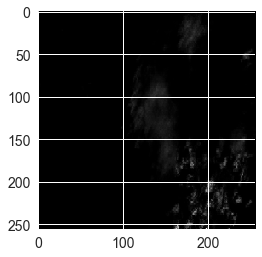

In [70]:
plt.imshow(np.array(run1F[0]),cmap='gray')
plt.show()

In [71]:
MSE = []
SSIM = []
for i in range(len(run1R)):
    m = mse(np.array(run1R[i]),np.array(run1F[i]))
    s = ssim(np.array(run1R[i]),np.array(run1F[i]))
    MSE.append(m)
    SSIM.append(s)

In [72]:
print(MSE)

[291.67161560058594, 205.52920532226562, 84.951171875, 189.55361938476562, 113.16146850585938, 89.20352172851562, 63.64247131347656, 196.54275512695312, 161.94065856933594, 325.9414825439453, 86.15576171875, 158.7964324951172, 279.15716552734375, 529.7150115966797, 110.11688232421875, 133.12686157226562, 293.0975036621094, 232.5703582763672, 90.2314453125, 319.114501953125, 229.2883758544922, 197.4781951904297, 297.75376892089844, 186.83253479003906, 99.28047180175781, 207.6002655029297, 176.3659210205078, 243.8763427734375, 239.25379943847656, 207.95516967773438, 70.36463928222656, 144.81494140625, 92.00302124023438, 172.2213897705078, 179.22933959960938, 82.454345703125, 56.154449462890625, 132.10690307617188, 321.6029815673828, 213.6167449951172, 183.38528442382812, 125.94924926757812, 106.62991333007812, 79.06663513183594, 94.47018432617188, 75.40225219726562, 280.1080780029297, 208.87274169921875, 58.38018798828125, 111.462646484375]


In [73]:
print(SSIM)

[0.7630912049967287, 0.8361063085561568, 0.8635705830581171, 0.8512799274138876, 0.9049034157443783, 0.8765113319125276, 0.8471707391502817, 0.7894104083503513, 0.8227788130814155, 0.8048143241842397, 0.8131445959105078, 0.9111407194824855, 0.847726566982082, 0.7158891140799603, 0.9207850997206275, 0.8208759614528648, 0.7936188098049272, 0.8617951080246087, 0.8577169907758455, 0.8659921105295264, 0.8765942774428827, 0.9007259492098353, 0.8914991948976485, 0.8886474130541214, 0.8958578102256811, 0.8519680961603737, 0.8659505836594721, 0.8007876707691836, 0.9064878276252448, 0.9196176299416693, 0.9258958356408599, 0.8128404688592666, 0.8933693954954501, 0.8506338366592533, 0.8548790554898524, 0.8692289629902801, 0.820738319913167, 0.8986150328837317, 0.7701904917099704, 0.7985665284271438, 0.8184664425744163, 0.8385363786247464, 0.8337872125589945, 0.8252932981827339, 0.8127236422875952, 0.8459297710941204, 0.8324605713435044, 0.7885575282363964, 0.8382028551169287, 0.8549571778814158]


In [74]:
x=list(range(0,50))

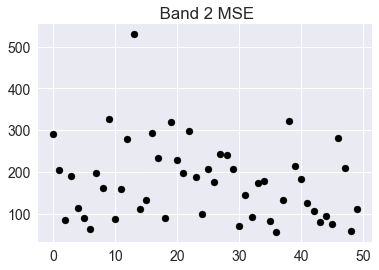

56.154449462890625 529.7150115966797
176.5640133666992


In [75]:
plt.scatter(x,MSE,c='black')
plt.title(" Band 2 MSE")
plt.show()
print(min(MSE),max(MSE))
print(np.mean(MSE))

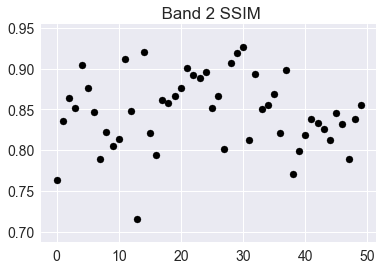

0.7158891140799603 0.9258958356408599
0.8470066278433491


In [76]:
plt.scatter(x,SSIM,c='black')
plt.title(" Band 2 SSIM")
plt.show()
print(min(SSIM),max(SSIM))
print(np.mean(SSIM))

In [77]:
from sklearn.metrics import confusion_matrix

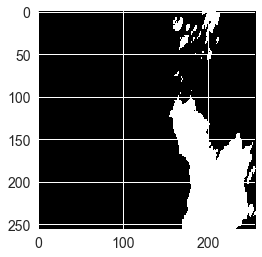

In [78]:
Thr = cv2.threshold(np.array(run1R[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thr[1],cmap = 'gray')
plt.show()

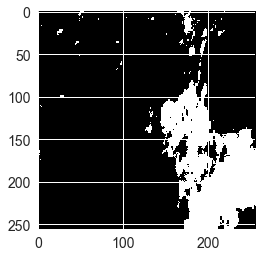

In [79]:
Thf = cv2.threshold(np.array(run1F[1]),1,255,cv2.THRESH_BINARY)
plt.imshow(Thf[1],cmap = 'gray')
plt.show()

In [80]:
Fthr = []
Fthf = []
for i in range(len(run1R)):
    gray_img= np.array(run1R[i])
    gray_img2= np.array(run1F[i])
    th1 = cv2.threshold(gray_img,1,255,cv2.THRESH_BINARY)
    th2 = cv2.threshold(gray_img2,1,255,cv2.THRESH_BINARY)
    Fr = list(th1[1].flatten())
    Ff = list(th2[1].flatten())
    Fthr.append(Fr)
    Fthf.append(Ff)

In [81]:
TN,FP,FN,TP = 0,0,0,0
TN1,FP1,FN1,TP1 = 0,0,0,0

In [82]:
for i in range(len(Fthr)):
    tn,fp,fn,tp=confusion_matrix(Fthr[i], Fthf[i]).ravel()
    TN = TN +tn
    FP = FP +fp
    FN = FN +fn
    TP = TP +tp

In [90]:
Total = TN+FP+FN+TP
TotalP = FN + TP
TotalN = TN + FP
PTN = (TN/Total)*100
PFP = (FP/Total)*100
PFN = (FN/Total)*100
PTP = (TP/Total)*100
To1 = FN + TN
To2 = TP + FP

In [84]:
PTC = []

In [85]:
PTC.append([PTN,PFP,PFN,PTP])

In [86]:
print(len(PTC))
print(PTC)

1
[[84.07888793945312, 6.161285400390625, 3.7936706542968746, 5.966156005859375]]


In [87]:
Correct = PTN + PTP
Wrong = PFN + PFP
print("Correct = ", Correct, " Wrong = ", Wrong)

Correct =  90.0450439453125  Wrong =  9.9549560546875


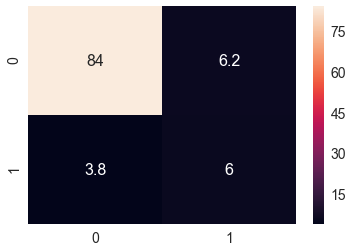

In [88]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[PTN,PFP],
        [PFN,PTP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

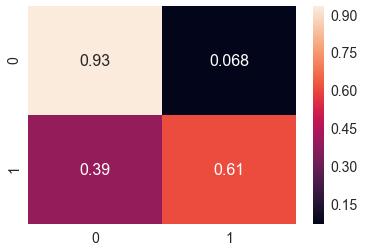

In [94]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/TotalN,FP/TotalN],
        [FN/TotalP,TP/TotalP]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

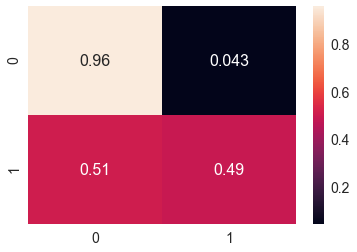

In [93]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = [[TN/To1,FN/To1],
        [FP/To2,TP/To2]]        
df_cm = pd.DataFrame(array, range(2),
                  range(2))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size